# Google Fit data

Google Fit stores data about you that can be useful if you want to analyse your movements, your health...

Google Fitは、あなたの動きや健康状態を分析するのに役立つあなたのデータを保存しています

### Daily Activity Metrics

From `Google Fit data`, the *daily activity metrics* file is pretty interesting to visualize, as it stores a lot of data.

`Google Fitデータ`に含まれる *daily activity metrics* ファイルは、多くのデータを保存しており、かなり興味深い視覚化が可能です。

In [1]:
import pandas as pd
import seaborn as sns

Note: *change `path` value with the path where you stored you daily activity metrics file*

In [3]:
path = "PATH_TO_YOUR_FILE"
df = pd.read_csv(path)

df

,Date,Move Minutes count,Calories (kcal),Distance (m),Heart Points,Heart Minutes,Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),...,Min speed (m/s),Step count,Average weight (kg),Max weight (kg),Min weight (kg),Biking duration (ms),Walking duration (ms),Running duration (ms),Soccer duration (ms),Strength training duration (ms)
0,2021-05-18,81.0,1248.111074,43.240284,41.0,41.0,NaN,NaN,NaN,NaN,...,0.298564,163,70.0,70.0,70.0,NaN,NaN,NaN,3600000.0,1200000.0
1,2021-05-19,62.0,1919.246304,2501.304291,34.0,34.0,47.763939,-3.126106,47.764324,-3.125534,...,0.009215,692,NaN,NaN,NaN,622322.0,78004.0,NaN,3000000.0,NaN
2,2021-05-20,28.0,1604.672514,364.387293,15.0,15.0,NaN,NaN,NaN,NaN,...,0.277973,855,NaN,NaN,NaN,NaN,393522.0,NaN,NaN,1200000.0
3,2021-05-21,20.0,1762.340283,265.618885,15.0,15.0,NaN,NaN,NaN,NaN,...,0.257383,741,NaN,NaN,NaN,NaN,198931.0,NaN,NaN,900000.0
4,2021-05-22,10.0,1524.714001,399.092492,NaN,NaN,NaN,NaN,NaN,NaN,...,0.288269,803,NaN,NaN,NaN,NaN,48229.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2022-01-13,54.0,1739.699998,3594.838801,31.0,31.0,49.032722,2.066133,49.040981,2.073807,...,0.267678,5488,NaN,NaN,NaN,NaN,3245005.0,273702.0,NaN,NaN
241,2022-01-14,109.0,1830.791040,7936.789044,73.0,69.0,48.702816,2.037694,49.041016,2.075675,...,0.152913,11260,NaN,NaN,NaN,NaN,5487363.0,NaN,NaN,NaN
242,2022-01-15,18.0,1596.351823,1002.518614,5.0,5.0,NaN,NaN,NaN,NaN,...,0.257383,1723,NaN,NaN,NaN,NaN,1321268.0,NaN,NaN,NaN
243,2022-01-16,98.0,1851.574928,6251.711880,47.0,47.0,49.032917,2.066609,49.040718,2.081287,...,0.137249,9144,NaN,NaN,NaN,NaN,5856702.0,NaN,NaN,NaN


Let's filter a bit the data.

データをフィルタリングしてみましょう。

In [39]:
df_sample = df[['Date','Calories (kcal)','Distance (m)','Step count']]
df_sample

,Date,Calories (kcal),Distance (m),Step count
0,2021-05-18,1248.111074,43.240284,163
1,2021-05-19,1919.246304,2501.304291,692
2,2021-05-20,1604.672514,364.387293,855
3,2021-05-21,1762.340283,265.618885,741
4,2021-05-22,1524.714001,399.092492,803
...,...,...,...,...
240,2022-01-13,1739.699998,3594.838801,5488
241,2022-01-14,1830.791040,7936.789044,11260
242,2022-01-15,1596.351823,1002.518614,1723
243,2022-01-16,1851.574928,6251.711880,9144


In [43]:
df_sample=df_sample.dropna(axis=0)
df_sample

,Date,Calories (kcal),Distance (m),Step count
0,2021-05-18,1248.111074,43.240284,163
1,2021-05-19,1919.246304,2501.304291,692
2,2021-05-20,1604.672514,364.387293,855
3,2021-05-21,1762.340283,265.618885,741
4,2021-05-22,1524.714001,399.092492,803
...,...,...,...,...
240,2022-01-13,1739.699998,3594.838801,5488
241,2022-01-14,1830.791040,7936.789044,11260
242,2022-01-15,1596.351823,1002.518614,1723
243,2022-01-16,1851.574928,6251.711880,9144


<AxesSubplot:>

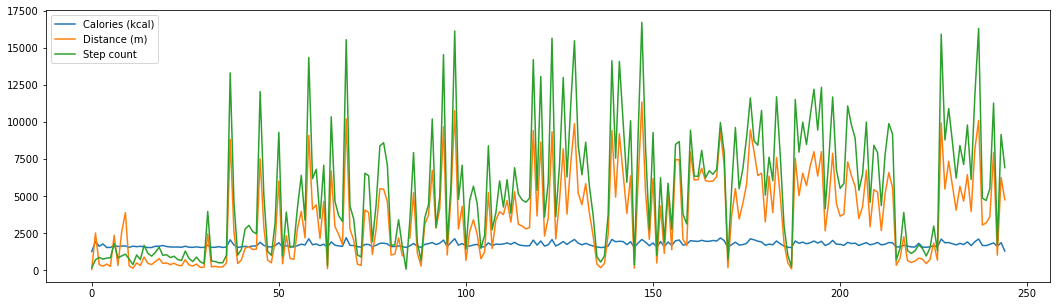

In [17]:
df_sample.plot(figsize=(18,5))

We can assume that there is a relation between `Distance` and `Step count` (obviously).

In Python, we can easily make a linear regression, to analyze the link between two variables.

`距離`と`歩数`の間には相関があると仮定できます(当然ですが)。

Pythonでは、2つの変数の間の関係を分析するために、線形回帰を簡単に作成することができます。

<AxesSubplot:xlabel='Distance (m)', ylabel='Step count'>

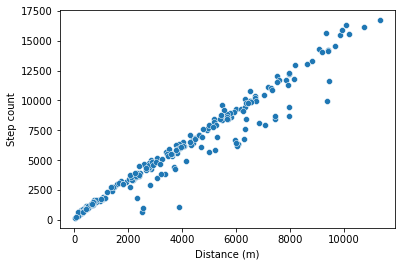

In [44]:
sns.scatterplot(x="Distance (m)", y="Step count",
             data=df_sample)


0.9759528296326464


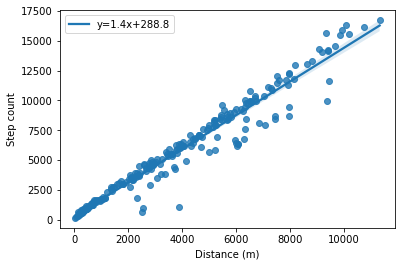

In [51]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df_sample['Distance (m)'],df_sample['Step count'])

print (r_value)
ax = sns.regplot(data=df_sample, x="Distance (m)", y="Step count", line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

R-value is close to 1.

**Limits of a linear regression**: explains a majority, but not all the points, even with a high R-value. 

**線形回帰の限界**：R値が高い状態でも大多数のポイントを説明できますが、すべてのポイントを説明できるわけではありません。

### Google Fit Sessions / Google Fitセッション

This folder includes all the recorded activities (sleeping, walking, running...) that Google stores on you. To analyze it, we use `Excavator`, the tool created by *Georepublic*.

**Note**: *Replace `path` value by the path where you stored your folder "All Sessions"*

このフォルダには、Googleが保存しているすべての記録された活動（睡眠、歩行、ランニング...）が含まれています。これを分析するため、 *Georepublic* が作成したツール、`Excavator`を使用します。

**Note**： *`path` の値は、"All Sessions" フォルダを保存したパスに置き換えてください*。

In [8]:
import subprocess
import sqlite3
path =""

command = ["excavator", "read", path, "--dbfile", "GoogleFitSessions.db"]

subprocess.call(command)

0

In [9]:
# connect to the excavated file
connection = sqlite3.connect('GoogleFitSessions.db')

# load the data as a pandas object
df = pd.read_sql_query("SELECT * FROM google_fit_activity", connection)

# examine the data
df.describe()

,uuid,activity,start,end,timestamp
count,453,453,453,453,453
unique,453,6,453,453,450
top,5892f63c-9bd8-4288-bf94-494aab0ab9f4,walking,2021-05-17T00:00:00Z,2021-05-17T06:00:00Z,1200s
freq,1,375,1,1,3


In [24]:
df_sample=df.drop(['uuid'], axis=1)
df_sample

,activity,start,end,timestamp
0,sleep,2021-05-17T00:00:00Z,2021-05-17T06:00:00Z,21600s
1,sleep,2021-05-17T22:30:00Z,2021-05-18T06:00:00Z,27000s
2,strength_training,2021-05-18T10:00:00Z,2021-05-18T10:20:00Z,1200s
3,football.soccer,2021-05-18T14:00:00Z,2021-05-18T15:00:00Z,3600s
4,sleep,2021-05-18T22:00:00Z,2021-05-19T03:15:00Z,18900s
...,...,...,...,...
448,walking,2022-01-14T09:01:45.544Z,2022-01-14T09:13:32.446Z,706.902s
449,walking,2022-01-14T10:56:19.281Z,2022-01-14T11:26:34.228Z,1814.947s
450,walking,2022-01-16T14:17:26.419Z,2022-01-16T14:30:33.493Z,787.074s
451,walking,2022-01-16T14:57:50.897Z,2022-01-16T15:14:46.195Z,1015.298s


In [75]:
pd.options.mode.chained_assignment = None # This will hide an unwanted warning


df_sleep=df_sample[df_sample['activity']=='sleep']
df_sleep['timestamp']=df_sleep['timestamp'].apply(lambda x: int(x[0:len(x)-1]))
df_sleep

,activity,start,end,timestamp
0,sleep,2021-05-17T00:00:00Z,2021-05-17T06:00:00Z,21600
1,sleep,2021-05-17T22:30:00Z,2021-05-18T06:00:00Z,27000
4,sleep,2021-05-18T22:00:00Z,2021-05-19T03:15:00Z,18900
8,sleep,2021-05-19T22:00:00Z,2021-05-20T05:30:00Z,27000
10,sleep,2021-05-20T22:32:13.353Z,2021-05-21T05:32:00.353Z,25187
12,sleep,2021-05-21T23:32:13.353Z,2021-05-22T08:30:00.353Z,32267
13,sleep,2021-05-22T22:15:13.353Z,2021-05-23T07:45:13.353Z,34200
14,sleep,2021-05-23T22:38:13.353Z,2021-05-24T05:00:00.353Z,22907
18,sleep,2021-05-25T21:56:13.353Z,2021-05-26T03:20:13.353Z,19440


You may not have a lot of records, maybe even 0 because it generally needs to be added manually using the Google Fit application.

一般的に、Google Fitアプリケーションを使って手動で追加する必要があるため、レコードの数は多くないかもしれません。場合によっては0である可能性もあります。

<AxesSubplot:>

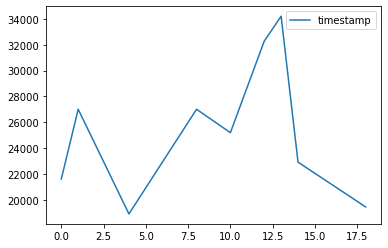

In [69]:
df_sleep.plot()

<AxesSubplot:>

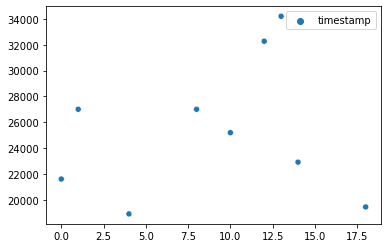

In [78]:
sns.scatterplot(
             data=df_sleep)

## Interesting analysis 

As always, having data starting before 2020 could be really interesting, to compare this data with the data since the beginning of the Covid crisis. 

We can assume that we would notice that people have less moved since 2020, because of quarantines, restrictions and Government rules.

Exploiting well `Google Fit data` could be helpful to prevent from health issues like obesity or depression.